# **Project Title: Indian Premier League (IPL) Cricket Match Analysis 🏏**

## **Project Description**

This project conducts a comprehensive analysis of ball-by-ball IPL match data from 2008 to 2024. The primary goal is to uncover the statistical patterns, player impacts, and strategic decisions that are most influential in determining match outcomes. By leveraging data visualization and statistical analysis, we aim to derive actionable insights that could be valuable for team strategists and cricket enthusiasts.

#
---

# **Problem Definition & Objectives**

## **Problem Statement**

What are the key statistical drivers of success in the Indian Premier League? This analysis seeks to move beyond surface-level statistics to identify which factors (like winning the toss, performance in key match phases, or specific player matchups) have the strongest correlation with winning matches.

## **Objectives**

1.  **Toss Analysis:** To determine the impact of winning the toss on match outcomes across different venues and seasons.
2.  **Performance in Phases:** To evaluate team and player performance during critical phases of the game, specifically the **Powerplay** (overs 1-6) and **Death Overs** (overs 16-20).
3.  **Player Profiling:** To identify the most valuable batsmen and bowlers based on their performance under various conditions (e.g., chasing a target, bowling in the death overs).
4.  **Venue Analysis:** To uncover how different stadiums influence match dynamics, such as scoring patterns and toss advantages.
5.  **Strategic Insights:** To synthesize the findings into data-driven recommendations that could inform team strategies, auction selections, and on-field tactics.

#
---

# **Data Collection & Sources**

The analysis is based on two primary datasets, which are publicly available and commonly used for IPL analysis. The data covers matches from the inaugural 2008 season up to the 2024 season.

1.  **`matches.csv`**: This file contains match-level information. Each row represents a single match and includes details such as:
    * Match ID, season, date, and venue.
    * The two competing teams.
    * Toss winner and their decision (to bat or field).
    * The winner of the match and the margin of victory.
    * Player of the match and the umpires.

2.  **`deliveries.csv`**: This file contains ball-by-ball data for every match. Each row represents one ball bowled and includes details like:
    * Match ID to link with the `matches.csv` file.
    * Inning, over, and ball number.
    * The batting and bowling teams.
    * The batsman on strike, the non-striker, and the bowler.
    * Runs scored, extras, and total runs on that delivery.

#
---

# **Data Cleaning & Preparation**

## **Install necessary libraries**

Open the Terminal in VS Code and run this command:

```
pip install -r requirements.txt
```

## **Load and Inspect the Data**

In [44]:
# Import the pandas library, which is the standard for data analysis in Python

import pandas as pd

In [45]:
# Load the two CSV files into pandas DataFrames
# A DataFrame is like a table or a spreadsheet in Python
# The '..' means 'go up one directory' from 'notebooks' to the main folder, then into 'sample_datasets'

matches_df = pd.read_csv('../sample_datasets/matches.csv')
deliveries_df = pd.read_csv('../sample_datasets/deliveries.csv')

In [46]:
# Display the first 5 rows of the matches DataFrame to see what it looks like

print("First 5 rows of the matches dataset:")
matches_df.head()

First 5 rows of the matches dataset:


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [47]:
# Get a concise summary of the matches DataFrame
# .info() tells us the column names, the number of non-null (non-empty) values, and the data type

print("Summary of the matches dataset:")
matches_df.info()

Summary of the matches dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-nu

In [48]:
# Count the number of missing (null) values in each column of the matches dataset

print("Missing values in the matches dataset:")
matches_df.isnull().sum()

Missing values in the matches dataset:


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

## **Cleaning the Data**

### **--- Step 1: Handling Missing 'city' Data ---**

In [49]:
# First, let's find out which venues have a missing city
# This helps us understand the problem before we solve it

print("Venues with missing city information:")
print(matches_df[matches_df['city'].isnull()]['venue'].unique())
print("-" * 100) # A separator line


Venues with missing city information:
['Sharjah Cricket Stadium' 'Dubai International Cricket Stadium']
----------------------------------------------------------------------------------------------------


In [50]:
# From the output, we see venues like 'Dubai International Cricket Stadium'. 
# The city is empty for the venue name. Let's fill the missing cities based on the venue.
# We'll use the venue name to determine the correct city.

matches_df.loc[matches_df['venue'] == 'Dubai International Cricket Stadium', 'city'] = 'Dubai'
matches_df.loc[matches_df['venue'] == 'Sharjah Cricket Stadium', 'city'] = 'Sharjah'

# Any remaining nulls in 'city' after this are likely for venues where the city is not obvious.
# We can either drop them or leave them, but since it's a small number, we'll leave them for now.

### **--- Step 2: Dropping Unnecessary Columns ---**

In [51]:
# The 'method' column is mostly empty and related to D/L method, which is rare.
# 'umpire1' and 'umpire2' are not needed for our current analysis objectives.
# The 'id' column is unique to each match, but we can use the DataFrame's index if needed. Let's drop it to keep things clean.

columns_to_drop = ['method', 'umpire1', 'umpire2']
matches_df.drop(columns=columns_to_drop, inplace=True)

# Explanation of parameters:
# 'columns': The list of columns we want to remove.
# 'inplace=True': This modifies the DataFrame directly, without needing to assign it back (e.g., matches_df = ...).


### **--- Step 3: Correcting Data Types ---**

In [52]:
# The 'date' column is currently a generic 'object' (text). 
# Converting it to a 'datetime' object allows us to easily extract the year, month, or day, and perform time-based analysis.

matches_df['date'] = pd.to_datetime(matches_df['date'])

### **--- Step 4: Final Verification ---**

In [53]:
# Let's run .info() again to confirm our changes.
# We expect to see:
# - More non-null values in the 'city' column.
# - The dropped columns ('method', 'umpire1', 'umpire2', 'id') should be gone.
# - The 'date' column's Dtype should now be 'datetime64[ns]'.

print("Summary of the CLEANED matches dataset:")
matches_df.info()

Summary of the CLEANED matches dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1095 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  result_margin    1076 non-null   float64       
 14  

In [11]:
# Let's also check the missing values again

print("\nMissing values in the CLEANED matches dataset:")
matches_df.isnull().sum()


Missing values in the CLEANED matches dataset:


season              0
city                0
date                0
match_type          0
player_of_match     5
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              5
result              0
result_margin      19
target_runs         3
target_overs        3
super_over          0
dtype: int64

### **--- Step 5: Save the Cleaned DataFrame ---**

In [54]:
# At this point, all cleaning is done. We save the result to a new file.

matches_df.to_csv('../sample_datasets/matches_cleaned.csv', index=False)

print("\nSuccessfully saved the cleaned data to 'matches_cleaned.csv'")


Successfully saved the cleaned data to 'matches_cleaned.csv'


#
---

# **Data Exploration & Summarization**

In [13]:
# Import the visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Set a style for our plots to make them look nice

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 8) # Sets the default size for plots

## **--- Analysis & Visualizations ---**

### **--- Step 1: First Exploration - Matches Per Season ---**

In [22]:
# We need to extract the 'year' from our 'date' column. 
# Since we converted the 'date' column to datetime objects, this is easy.
# .dt.year creates a new Series containing just the year of each match.

matches_df['season'] = matches_df['date'].dt.year

C:\Users\Sahil Kesharwani\AppData\Local\Temp\ipykernel_6600\205713028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='season', data=matches_df, palette='viridis')


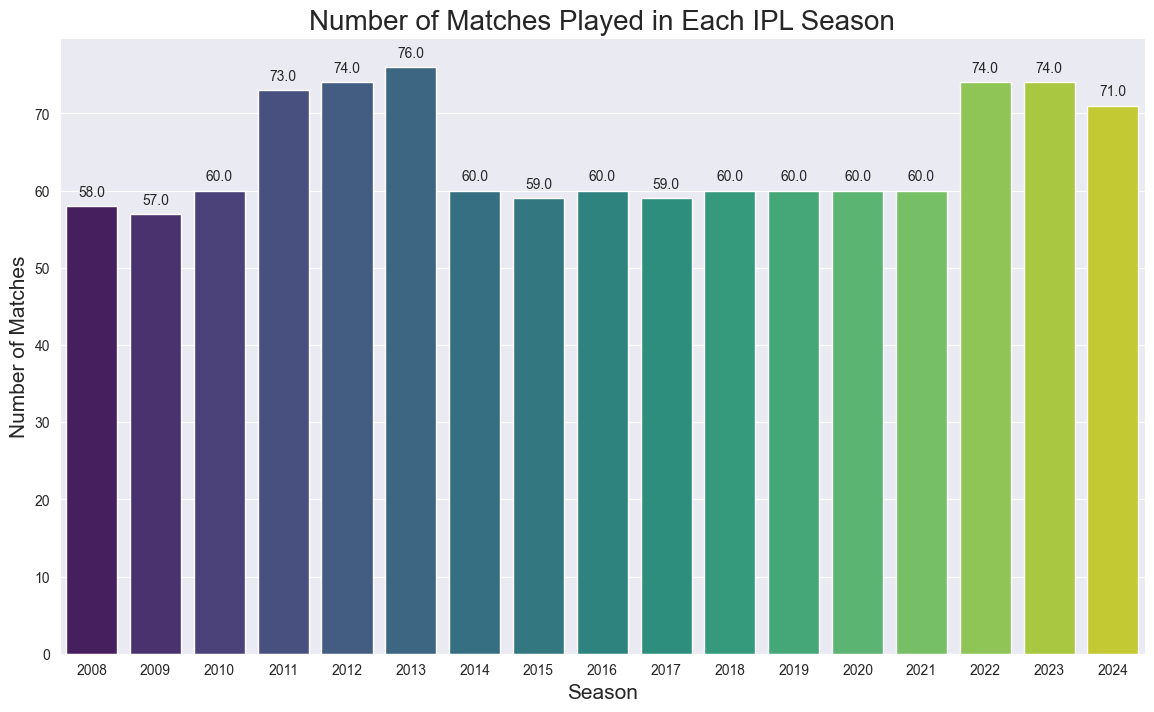

In [23]:
# Now, we will create a countplot.
# A countplot simply counts the occurrences of each item in a column.

ax = sns.countplot(x='season', data=matches_df, palette='viridis')
plt.title('Number of Matches Played in Each IPL Season', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Number of Matches', fontsize=15)


# This loop adds the exact count on top of each bar for better readability
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Save the plot to our 'images' folder for the final report
plt.savefig('../visualizations/01_matches_per_season.png')


# Display the plot in the notebook
plt.show()

### **--- Step 2: Toss Analysis ---**

In [19]:
# Create a new column to see if the toss winner was also the match winner
# This will be 'True' if they are the same, and 'False' otherwise

matches_df['toss_match_winner'] = matches_df['toss_winner'] == matches_df['winner']

C:\Users\Sahil Kesharwani\AppData\Local\Temp\ipykernel_6600\956762853.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='toss_match_winner', data=matches_df, palette='coolwarm')


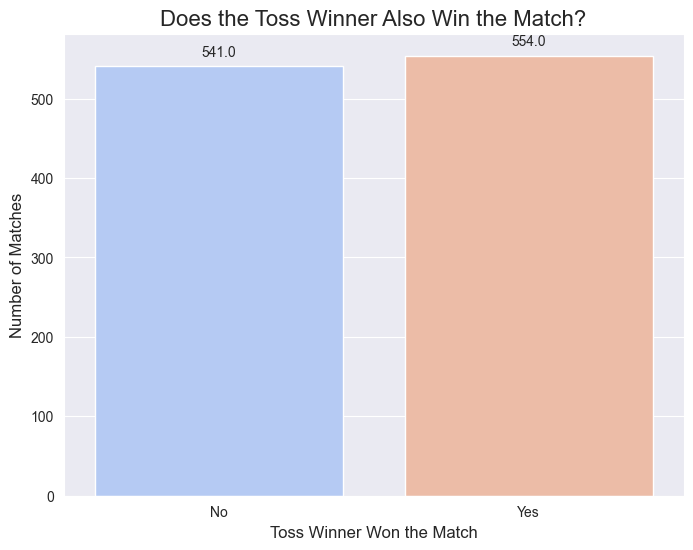

In [20]:
# --- Visualize Overall Toss Impact ---

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='toss_match_winner', data=matches_df, palette='coolwarm')
plt.title('Does the Toss Winner Also Win the Match?', fontsize=16)
plt.xlabel('Toss Winner Won the Match', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks([False, True], ['No', 'Yes']) # Rename the x-axis labels for clarity


# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('../visualizations/02_toss_impact_overall.png')
plt.show()

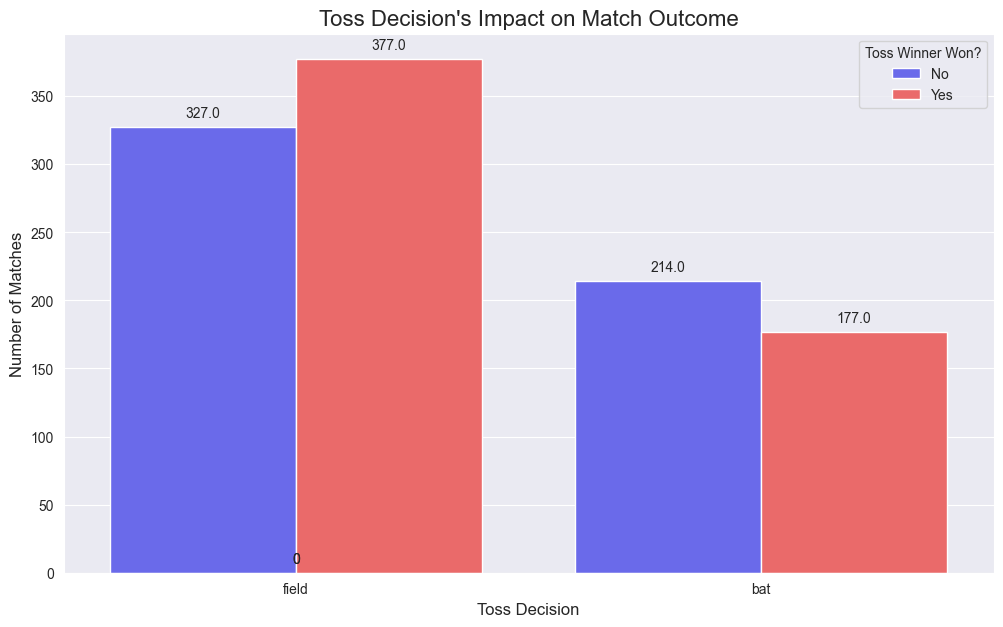

In [21]:
# --- Visualize Toss Decision Impact ---

# Now, let's see how the toss decision (bat or field) affects the outcome
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='toss_decision', data=matches_df, hue='toss_match_winner', palette='seismic')
plt.title('Toss Decision\'s Impact on Match Outcome', fontsize=16)
plt.xlabel('Toss Decision', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.legend(title='Toss Winner Won?', labels=['No', 'Yes'])


# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('../visualizations/03_toss_decision_impact.png')
plt.show()

### **--- Step 3: Venue Analysis ---**

In [24]:
# We only want to consider matches with a clear result. 
# Let's filter out matches that were ties or had no result.

matches_with_result = matches_df[matches_df['winner'].notna()]

In [25]:
# --- Analysis ---

# We want to see the win percentage of the team batting second (chasing).
# The 'winner' is the team that won. If the toss winner chose to field, they are batting second.
# But an easier way is to check the 'result' column. A 'wickets' win means the chasing team won.

matches_with_result['chasing_win'] = matches_with_result['result'] == 'wickets'


# Now, let's calculate the win percentage for chasing teams at each venue
venue_win_percentage = matches_with_result.groupby('venue')['chasing_win'].mean() * 100


# We'll sort the venues by win percentage and select the top 15 for a clean plot
top_venues = venue_win_percentage.sort_values(ascending=False).head(15)

C:\Users\Sahil Kesharwani\AppData\Local\Temp\ipykernel_6600\2058085827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_result['chasing_win'] = matches_with_result['result'] == 'wickets'


C:\Users\Sahil Kesharwani\AppData\Local\Temp\ipykernel_6600\2726028652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_venues.index, x=top_venues.values, palette='plasma', orient='h')


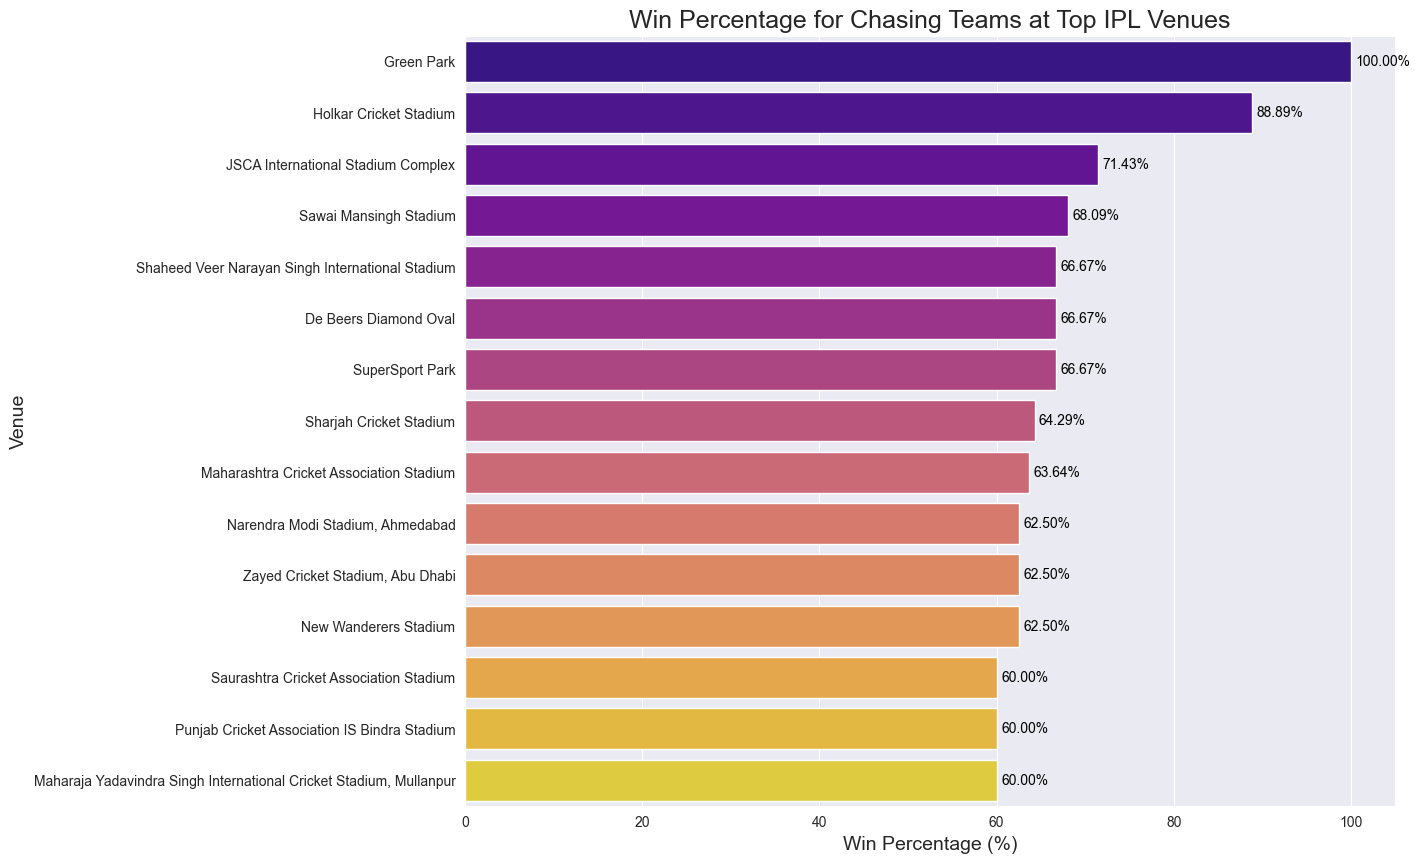

In [26]:
# --- Visualization ---

plt.figure(figsize=(12, 10))
ax = sns.barplot(y=top_venues.index, x=top_venues.values, palette='plasma', orient='h')

plt.title('Win Percentage for Chasing Teams at Top IPL Venues', fontsize=18)
plt.xlabel('Win Percentage (%)', fontsize=14)
plt.ylabel('Venue', fontsize=14)


# Add percentage text on the bars
for i, v in enumerate(top_venues.values):
    ax.text(v + 0.5, i, f'{v:.2f}%', color='black', va='center')

plt.savefig('../visualizations/04_venue_chasing_win_percentage.png')
plt.show()

### **--- Step 4: Player Analysis - Top Run Scorers ---**

In [28]:
# If dataset deliveries_df haven't been loaded in current session, load it by uncommenting the next line
# deliveries_df = pd.read_csv('../sample_datasets/deliveries.csv')

In [29]:
# --- Analysis ---

# We group the deliveries DataFrame by the 'batter' column.
# Then, for each batter, we sum up their 'batsman_runs'.
# This gives us the total runs scored by each player.

batsman_runs = deliveries_df.groupby('batter')['batsman_runs'].sum()



# We sort these values in descending order to get the highest run-scorers at the top
# and select the top 15 for our chart.

top_batsmen = batsman_runs.sort_values(ascending=False).head(15)

C:\Users\Sahil Kesharwani\AppData\Local\Temp\ipykernel_6600\3167573565.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_batsmen.index, x=top_batsmen.values, palette='magma', orient='h')


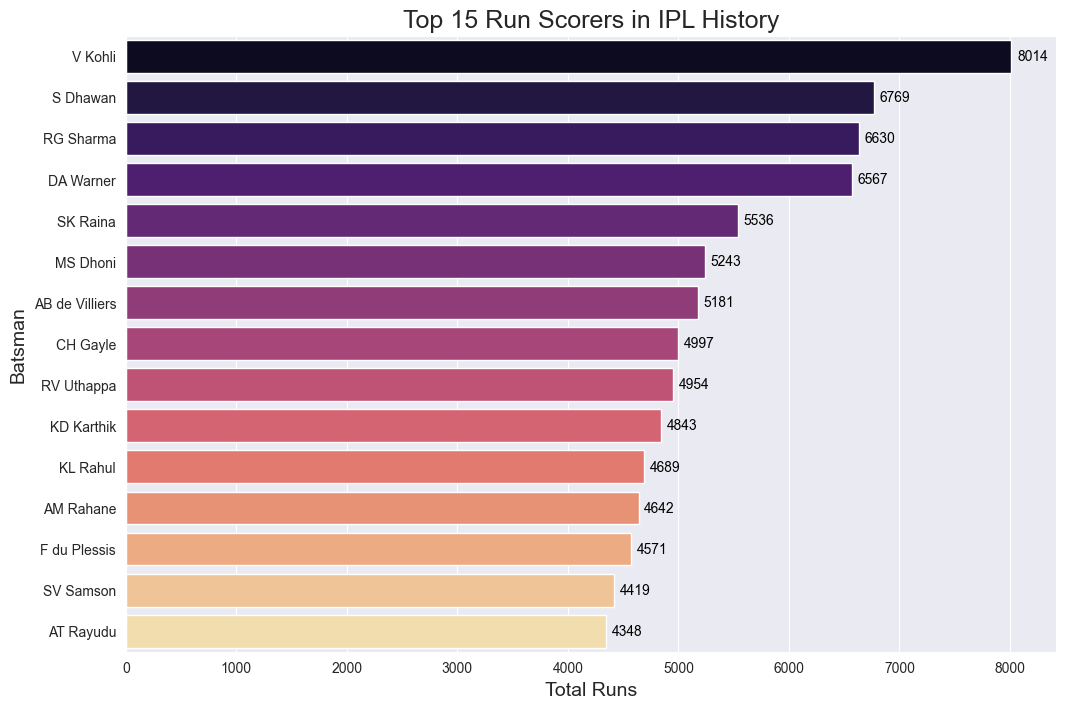

In [31]:
# --- Visualization ---

plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_batsmen.index, x=top_batsmen.values, palette='magma', orient='h')

plt.title('Top 15 Run Scorers in IPL History', fontsize=18)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Batsman', fontsize=14)


# Add the total runs as text on each bar
for i, v in enumerate(top_batsmen.values):
    ax.text(v + 50, i, str(v), color='black', va='center') # '+50' is for positioning the text

plt.savefig('../visualizations/05_top_run_scorers.png')
plt.show()

### **--- Step 5: Player Analysis - Top Wicket Takers ---**

In [32]:
# We only want rows where a wicket was taken

wickets_df = deliveries_df[deliveries_df['is_wicket'] == 1]


# Not all dismissals are credited to the bowler. 
# We need to exclude run outs, retired hurt, etc.
# These are the dismissal types credited to the bowler.

bowler_wickets = [
    'caught', 'bowled', 'lbw', 'stumped', 
    'caught and bowled', 'hit wicket'
]
wickets_df = wickets_df[wickets_df['dismissal_kind'].isin(bowler_wickets)]

In [33]:
# --- Analysis ---

# Now we group by the 'bowler' and count the number of wickets

top_bowlers = wickets_df['bowler'].value_counts().head(15)

C:\Users\Sahil Kesharwani\AppData\Local\Temp\ipykernel_6600\2069026475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_bowlers.index, x=top_bowlers.values, palette='rocket', orient='h')


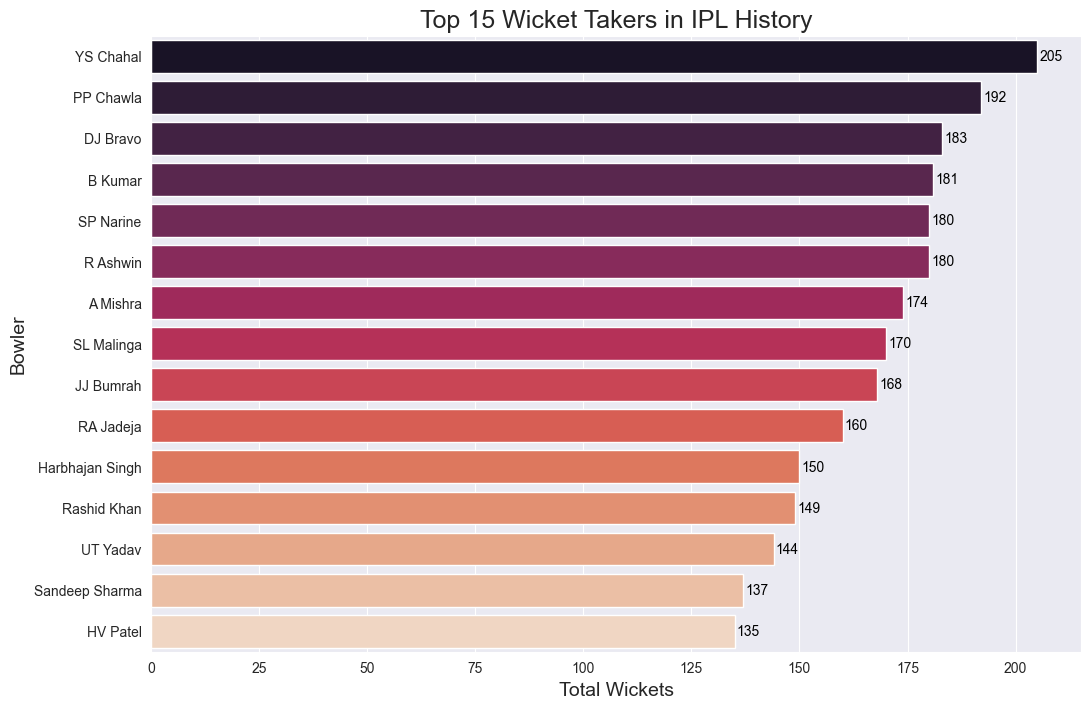

In [35]:
# --- Visualization ---

plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_bowlers.index, x=top_bowlers.values, palette='rocket', orient='h')

plt.title('Top 15 Wicket Takers in IPL History', fontsize=18)
plt.xlabel('Total Wickets', fontsize=14)
plt.ylabel('Bowler', fontsize=14)

# Add the total wickets as text on each bar
for i, v in enumerate(top_bowlers.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center')

plt.savefig('../visualizations/06_top_wicket_takers.png')
plt.show()

### **--- Step 6: Powerplay Batting Analysis ---**

In [36]:
# First, create a new DataFrame containing only the deliveries from the Powerplay (first 6 overs)

powerplay_df = deliveries_df[deliveries_df['over'] <= 6]

In [37]:
# --- Analysis ---

# 1. Calculate total runs scored by each batsman in the Powerplay

pp_runs = powerplay_df.groupby('batter')['batsman_runs'].sum()


# 2. Calculate total balls faced by each batsman in the Powerplay
#    We need to exclude wides, as they don't count towards the batsman's ball count.

pp_balls_faced = powerplay_df[powerplay_df['extras_type'] != 'wides'].groupby('batter').size()


# 3. Combine the runs and balls faced into a single DataFrame

pp_stats = pd.DataFrame({'runs': pp_runs, 'balls': pp_balls_faced})


# 4. Calculate the Strike Rate for each batsman
#    Strike Rate = (Total Runs / Balls Faced) * 100

pp_stats['strike_rate'] = (pp_stats['runs'] / pp_stats['balls']) * 100


# To make our analysis meaningful, let's filter for batsmen who have scored at least 500 runs in the Powerplay

pp_stats_filtered = pp_stats[pp_stats['runs'] >= 500].sort_values(by='strike_rate', ascending=False)

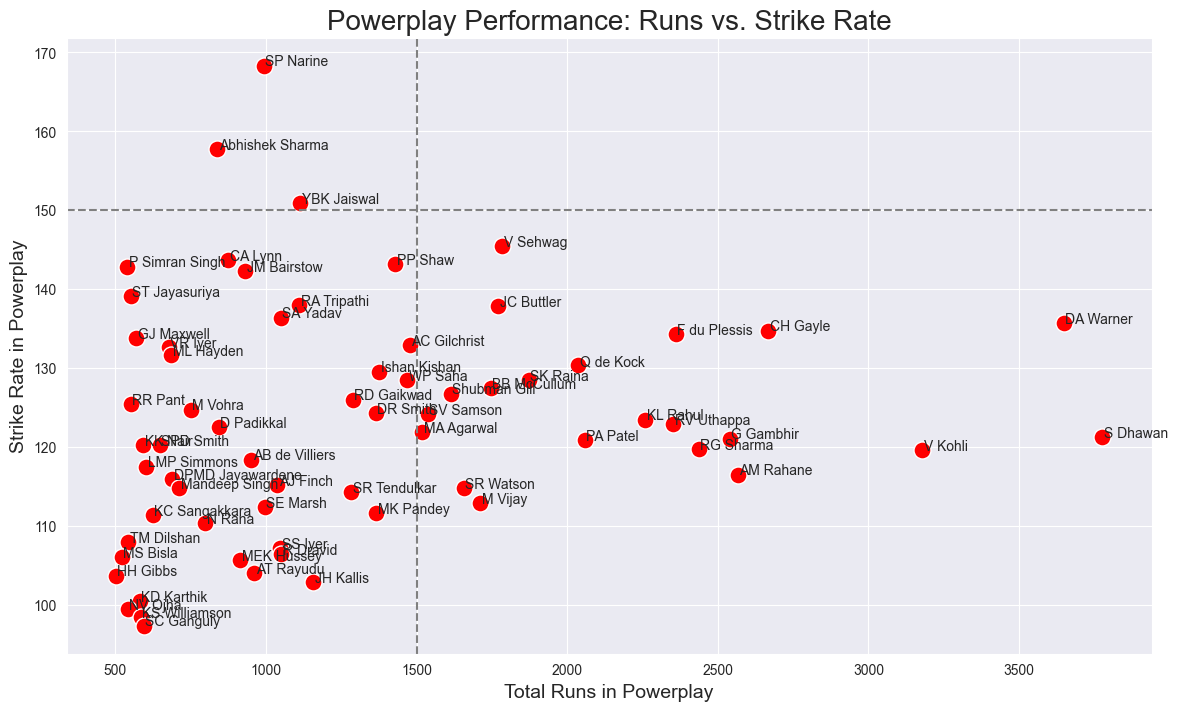

In [38]:
# --- Visualization ---

# A scatter plot is perfect to visualize both runs and strike rate at the same time

plt.figure(figsize=(14, 8))
sns.scatterplot(x='runs', y='strike_rate', data=pp_stats_filtered, s=150, color='red')


# This loop adds the player's name next to their dot on the scatter plot

for i in range(pp_stats_filtered.shape[0]):
    plt.text(pp_stats_filtered['runs'].iloc[i] + 5, # x-coordinate
             pp_stats_filtered['strike_rate'].iloc[i], # y-coordinate
             pp_stats_filtered.index[i]) # The player's name


plt.title('Powerplay Performance: Runs vs. Strike Rate', fontsize=20)
plt.xlabel('Total Runs in Powerplay', fontsize=14)
plt.ylabel('Strike Rate in Powerplay', fontsize=14)
plt.axhline(150, ls='--', color='grey') # Add a reference line for a high strike rate
plt.axvline(1500, ls='--', color='grey') # Add a reference line for high total runs

plt.savefig('../visualizations/07_powerplay_batting_analysis.png')
plt.show()

### **--- Step 7: Death Over Bowling Analysis ---**

In [39]:
# Create a new DataFrame for deliveries bowled in the death overs (overs 16-20)

death_overs_df = deliveries_df[deliveries_df['over'] >= 16]

In [40]:
# --- Analysis ---

# 1. Calculate total runs conceded by each bowler in the death overs

death_runs = death_overs_df.groupby('bowler')['total_runs'].sum()


# 2. Calculate the number of balls bowled by each bowler in the death overs
#    We exclude no-balls and wides from the ball count, as they have to be re-bowled.

death_balls = death_overs_df[(death_overs_df['extras_type'] != 'wides') & (death_overs_df['extras_type'] != 'noballs')].groupby('bowler').size()


# 3. Calculate the number of overs bowled (balls / 6)

death_overs_bowled = death_balls / 6


# 4. Combine into a single DataFrame

death_stats = pd.DataFrame({'runs_conceded': death_runs, 'overs_bowled': death_overs_bowled})


# 5. To ensure our analysis is robust, let's filter for bowlers who have bowled at least 200 balls (~33 overs) at the death

death_stats_filtered = death_stats[death_stats['overs_bowled'] * 6 >= 200]


# 6. Calculate the Economy Rate
#    Economy Rate = Total Runs Conceded / Total Overs Bowled

death_stats_filtered['economy_rate'] = death_stats_filtered['runs_conceded'] / death_stats_filtered['overs_bowled']


# Sort by the best economy rate and select the top 15
top_death_bowlers = death_stats_filtered.sort_values(by='economy_rate').head(15)

C:\Users\Sahil Kesharwani\AppData\Local\Temp\ipykernel_6600\1099920657.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_stats_filtered['economy_rate'] = death_stats_filtered['runs_conceded'] / death_stats_filtered['overs_bowled']


C:\Users\Sahil Kesharwani\AppData\Local\Temp\ipykernel_6600\355538647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_death_bowlers.index, x=top_death_bowlers['economy_rate'], palette='viridis_r', orient='h')


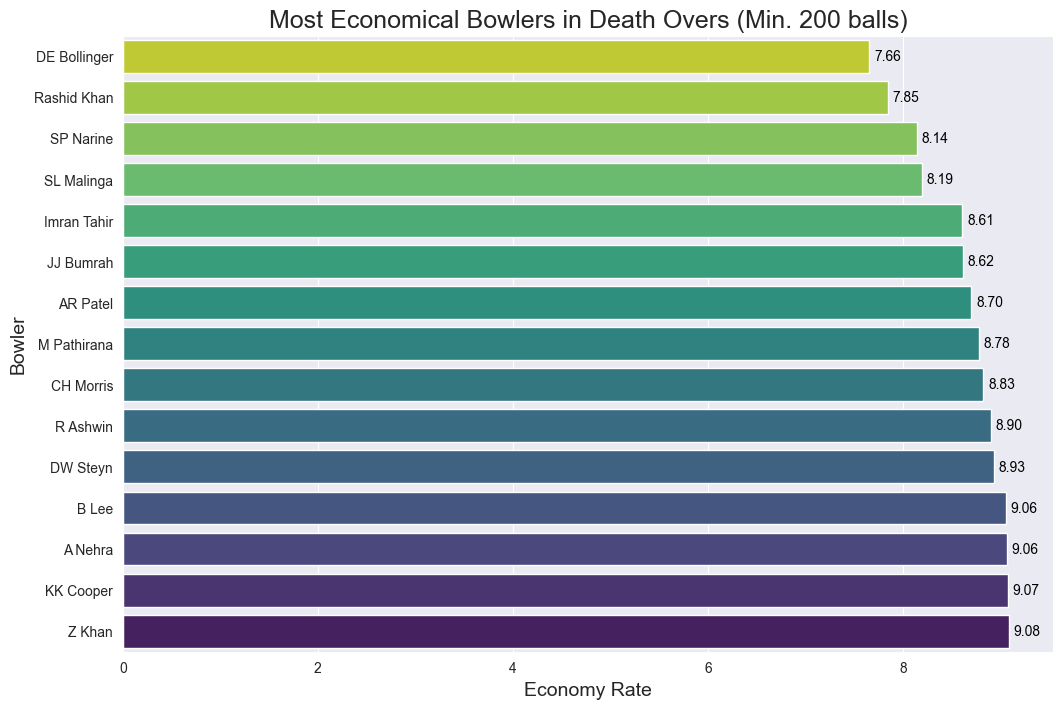

In [42]:
# --- Visualization ---

plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_death_bowlers.index, x=top_death_bowlers['economy_rate'], palette='viridis_r', orient='h')

plt.title('Most Economical Bowlers in Death Overs (Min. 200 balls)', fontsize=18)
plt.xlabel('Economy Rate', fontsize=14)
plt.ylabel('Bowler', fontsize=14)


# Add the economy rate text on each bar
for i, v in enumerate(top_death_bowlers['economy_rate']):
    ax.text(v + 0.05, i, f'{v:.2f}', color='black', va='center')

plt.savefig('../visualizations/08_death_over_bowling.png')
plt.show()

---

# **Data Visualization**

#
---

# **Insights & Interpretation**

#
---

# **Report & Presentation**